In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close.values

In [ ]:
cl.shape

In [ ]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

In [ ]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)


In [ ]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

In [28]:
#Build the model
model = Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/300
32/32 [==============================] - 8s 59ms/step - loss: 0.0045 - val_loss: 0.0189
Epoch 2/300
32/32 [==============================] - 0s 14ms/step - loss: 0.0086 - val_loss: 9.8228e-04
Epoch 3/300
32/32 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/300
32/32 [==============================] - 1s 19ms/step - loss: 6.3083e-04 - val_loss: 0.0016
Epoch 5/300
32/32 [==============================] - 0s 11ms/step - loss: 4.4877e-04 - val_loss: 8.5335e-04
Epoch 6/300
32/32 [==============================] - 0s 13ms/step - loss: 2.6837e-04 - val_loss: 6.3877e-04
Epoch 7/300
32/32 [==============================] - 0s 13ms/step - loss: 2.4533e-04 - val_loss: 6.2830e-04
Epoch 8/300
32/32 [==============================] - 0s 12ms/step - loss: 2.4762e-04 - val_loss: 6.3952e-04
Epoch 9/300
32/32 [==============================] - 0s 12ms/step - loss: 2.5595e-04 - val_loss: 6.5586e-04
Epoch 10/300
32/32 [==============================] 

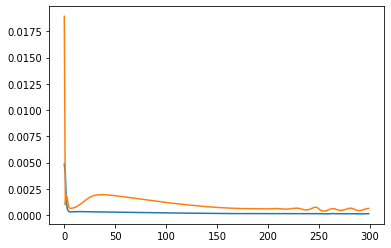

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [30]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

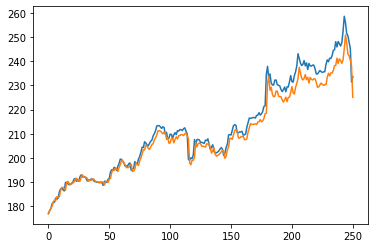

In [31]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [32]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.8282]], actual:[[231.44]]


In [33]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [34]:
#result_df.plot(kind='line')

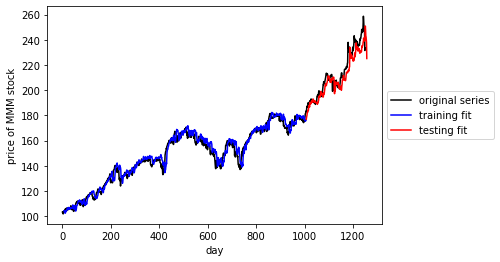

In [35]:
# plot original data
plt.plot(scl.inverse_transform(y.reshape(-1,1)), color='k')

Xtrain = model.predict(X_train)
Xtest = model.predict(X_test)

# plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
split_pt = int(X.shape[0]*0.80) + 7 # window_size
plt.plot(np.arange(7,split_pt,1), scl.inverse_transform(Xtrain), color='b')
plt.plot(np.arange(split_pt,split_pt+len(Xtest),1), scl.inverse_transform(Xtest), color='r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('price of MMM stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [36]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [ ]:
X_test[248]